# Text summarization

### Method 1  - Basic method using the words with highest frequency

In [1]:
import spacy

In [2]:
nlp = spacy.load("en_core_web_sm")

In [3]:
text = "Pernod takeover talk lifts Domecq Shares in UK drinks and food firm Allied Domecq have risen on speculation that it could be the target of a takeover by France's Pernod Ricard. Reports in the Wall Street Journal and the Financial Times suggested that the French spirits firm is considering a bid, but has yet to contact its target. Allied Domecq shares in London rose 4% by 1200 GMT, while Pernod shares in Paris slipped 1.2%. Pernod said it was seeking acquisitions but refused to comment on specifics. Pernod's last major purchase was a third of US giant Seagram in 2000, the move which propelled it into the global top three of drinks firms. The other two-thirds of Seagram was bought by market leader Diageo. In terms of market value, Pernod - at 7.5bn euros ($9.7bn) - is about 9% smaller than Allied Domecq, which has a capitalisation of £5.7bn ($10.7bn; 8.2bn euros). Last year Pernod tried to buy Glenmorangie, one of Scotland's premier whisky firms, but lost out to luxury goods firm LVMH. Pernod is home to brands including Chivas Regal Scotch whisky, Havana Club rum and Jacob's Creek wine. Allied Domecq's big names include Malibu rum, Courvoisier brandy, Stolichnaya vodka and Ballantine's whisky - as well as snack food chains such as Dunkin' Donuts and Baskin-Robbins ice cream. The WSJ said that the two were ripe for consolidation, having each dealt with problematic parts of their portfolio. Pernod has reduced the debt it took on to fund the Seagram purchase to just 1.8bn euros, while Allied has improved the performance of its fast-food chains."

In [4]:
doc = nlp(text)
clean_doc = []
for token in doc:
    if not token.is_stop and not token.is_punct and not token.like_num:
        clean_doc.append(token.text)

print(' '.join(clean_doc))

Pernod takeover talk lifts Domecq Shares UK drinks food firm Allied Domecq risen speculation target takeover France Pernod Ricard Reports Wall Street Journal Financial Times suggested French spirits firm considering bid contact target Allied Domecq shares London rose GMT Pernod shares Paris slipped Pernod said seeking acquisitions refused comment specifics Pernod major purchase giant Seagram propelled global drinks firms thirds Seagram bought market leader Diageo terms market value Pernod 7.5bn euros $ 9.7bn smaller Allied Domecq capitalisation £ 5.7bn $ 10.7bn 8.2bn euros year Pernod tried buy Glenmorangie Scotland premier whisky firms lost luxury goods firm LVMH Pernod home brands including Chivas Regal Scotch whisky Havana Club rum Jacob Creek wine Allied Domecq big names include Malibu rum Courvoisier brandy Stolichnaya vodka Ballantine whisky snack food chains Dunkin Donuts Baskin Robbins ice cream WSJ said ripe consolidation having dealt problematic parts portfolio Pernod reduced

In [5]:
sentence = [each_sentence for each_sentence in doc.sents]
sentence

[Pernod takeover talk lifts Domecq Shares in UK drinks and food firm Allied Domecq have risen on speculation that it could be the target of a takeover by France's Pernod Ricard.,
 Reports in the Wall Street Journal and the Financial Times suggested that the French spirits firm is considering a bid, but has yet to contact its target.,
 Allied Domecq shares in London rose 4% by 1200 GMT, while Pernod shares in Paris slipped 1.2%.,
 Pernod said it was seeking acquisitions but refused to comment on specifics.,
 Pernod's last major purchase was a third of US giant Seagram in 2000, the move which propelled it into the global top three of drinks firms.,
 The other two-thirds of Seagram was bought by market leader Diageo.,
 In terms of market value, Pernod - at 7.5bn euros ($9.7bn) - is about 9% smaller than Allied Domecq, which has a capitalisation of £5.7bn ($10.7bn; 8.2bn euros).,
 Last year Pernod tried to buy Glenmorangie, one of Scotland's premier whisky firms, but lost out to luxury goo

In [6]:
word_length = {}
for token in clean_doc:
    if token not in word_length:
        word_length[token] = 1
    else:
        word_length[token] += 1


In [7]:
word_length_sorted = {key: value for key, value in sorted(word_length.items(), key=lambda x: x[1])}
word_length_sorted

{'talk': 1,
 'lifts': 1,
 'Shares': 1,
 'UK': 1,
 'risen': 1,
 'speculation': 1,
 'France': 1,
 'Ricard': 1,
 'Reports': 1,
 'Wall': 1,
 'Street': 1,
 'Journal': 1,
 'Financial': 1,
 'Times': 1,
 'suggested': 1,
 'French': 1,
 'spirits': 1,
 'considering': 1,
 'bid': 1,
 'contact': 1,
 'London': 1,
 'rose': 1,
 'GMT': 1,
 'Paris': 1,
 'slipped': 1,
 'seeking': 1,
 'acquisitions': 1,
 'refused': 1,
 'comment': 1,
 'specifics': 1,
 'major': 1,
 'giant': 1,
 'propelled': 1,
 'global': 1,
 'thirds': 1,
 'bought': 1,
 'leader': 1,
 'Diageo': 1,
 'terms': 1,
 'value': 1,
 '7.5bn': 1,
 '9.7bn': 1,
 'smaller': 1,
 'capitalisation': 1,
 '£': 1,
 '5.7bn': 1,
 '10.7bn': 1,
 '8.2bn': 1,
 'year': 1,
 'tried': 1,
 'buy': 1,
 'Glenmorangie': 1,
 'Scotland': 1,
 'premier': 1,
 'lost': 1,
 'luxury': 1,
 'goods': 1,
 'LVMH': 1,
 'home': 1,
 'brands': 1,
 'including': 1,
 'Chivas': 1,
 'Regal': 1,
 'Scotch': 1,
 'Havana': 1,
 'Club': 1,
 'Jacob': 1,
 'Creek': 1,
 'wine': 1,
 'big': 1,
 'names': 1,
 'incl

In [8]:
word_freq = {}
max_word = max(word_length_sorted.values())
for k, v in word_length_sorted.items():
    word_freq[k] = round(v / max_word, 1)

In [9]:
print('Pernod' in word_freq.keys())

True


In [10]:
len(sentence)

12

In [11]:
sentence_scores = {}
for index, each_sentence in enumerate(sentence):
    sentence_score = 0.0
    for each_word in each_sentence:
        if each_word.text in word_freq.keys():
            sentence_score += round(word_freq[each_word.text], 1)
    sentence_scores[index] = sentence_score

In [12]:
sentence_scores

{0: 5.999999999999999,
 1: 1.7000000000000002,
 2: 3.1000000000000005,
 3: 1.7000000000000004,
 4: 2.3000000000000007,
 5: 0.8999999999999999,
 6: 4.4,
 7: 2.8000000000000007,
 8: 2.600000000000001,
 9: 3.800000000000001,
 10: 0.9999999999999999,
 11: 3.7000000000000006}

In [13]:
threshold = 3.0
summary = " "
for index, each_sentence in enumerate(sentence):
    if sentence_scores[index] > threshold:
        summary += sentence[index].text

print(summary)

 Pernod takeover talk lifts Domecq Shares in UK drinks and food firm Allied Domecq have risen on speculation that it could be the target of a takeover by France's Pernod Ricard.Allied Domecq shares in London rose 4% by 1200 GMT, while Pernod shares in Paris slipped 1.2%.In terms of market value, Pernod - at 7.5bn euros ($9.7bn) - is about 9% smaller than Allied Domecq, which has a capitalisation of £5.7bn ($10.7bn; 8.2bn euros).Allied Domecq's big names include Malibu rum, Courvoisier brandy, Stolichnaya vodka and Ballantine's whisky - as well as snack food chains such as Dunkin' Donuts and Baskin-Robbins ice cream.Pernod has reduced the debt it took on to fund the Seagram purchase to just 1.8bn euros, while Allied has improved the performance of its fast-food chains.


### Method 2 - Using TextRank Algorithm

In [36]:
from sentence_transformers import SentenceTransformer
import torch.nn.functional as F
import torch
import networkx as nx

In [17]:
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [18]:
sentence_embeddings = sbert_model.encode(sentence)

In [48]:
similarities_graph = {}

for vec_a in range(sentence_embeddings.shape[0]):
    for vec_b in range(vec_a, sentence_embeddings.shape[0]):
        if vec_a != vec_b:
            cosine_similarity = F.cosine_similarity(torch.from_numpy(sentence_embeddings[vec_a]),
                                                    torch.from_numpy(sentence_embeddings[vec_b]), dim=0)
            
            similarities_graph[(vec_a, vec_b)] = cosine_similarity.item()

In [49]:
similarities_graph

{(0, 1): 0.8237000107765198,
 (0, 2): 0.792661190032959,
 (0, 3): 0.9038957953453064,
 (0, 4): 0.8973976969718933,
 (0, 5): 0.795494019985199,
 (0, 6): 0.824608325958252,
 (0, 7): 0.6371958255767822,
 (0, 8): 0.8932214379310608,
 (0, 9): 0.792661190032959,
 (0, 10): 0.8134665489196777,
 (0, 11): 0.8929002285003662,
 (1, 2): 0.7374216318130493,
 (1, 3): 0.907333254814148,
 (1, 4): 0.8803240656852722,
 (1, 5): 0.8773582577705383,
 (1, 6): 0.9316951632499695,
 (1, 7): 0.6895619630813599,
 (1, 8): 0.9173576831817627,
 (1, 9): 0.7374216318130493,
 (1, 10): 0.8915561437606812,
 (1, 11): 0.9161722660064697,
 (2, 3): 0.7921347618103027,
 (2, 4): 0.8053892850875854,
 (2, 5): 0.7322275042533875,
 (2, 6): 0.757196843624115,
 (2, 7): 0.5621844530105591,
 (2, 8): 0.7854528427124023,
 (2, 9): 1.0,
 (2, 10): 0.751318097114563,
 (2, 11): 0.7842512130737305,
 (3, 4): 0.9657736420631409,
 (3, 5): 0.8606841564178467,
 (3, 6): 0.8967716097831726,
 (3, 7): 0.6810842156410217,
 (3, 8): 0.979546308517456,
 (

In [50]:
G = nx.Graph()
edges = [(k[0], k[1], {'weight': v}) for k, v in similarities_graph.items()]
G.add_edges_from(edges)

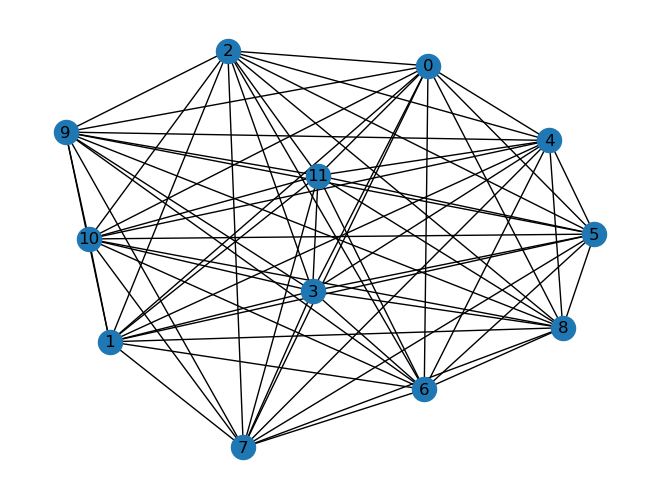

In [68]:
nx.draw(G, with_labels=True)

In [69]:
rank = nx.pagerank(G)

In [72]:
rank

{0: 0.08351549341236178,
 1: 0.08544101953610872,
 2: 0.07904250938428017,
 3: 0.08803912780741592,
 4: 0.08778273668945209,
 5: 0.0827799627836301,
 6: 0.08535888378617966,
 7: 0.06850849644611258,
 8: 0.08830311175729869,
 9: 0.07904250938428019,
 10: 0.08399986063851805,
 11: 0.08818628837436192}

## Method 3 - K Means